# Practice 2 - Andrés Velasco Sánchez

## Unconstrained Optimization Problem

Given the function:

$$
f(x_1, x_2) = x_1^2 + 3x_2^2 + (x_1 - 2)(x_2 - 3)
$$

Starting from the origin \( 0, 0 \), perform the following:




In [25]:
from Multidimensional_Uns_Optimizer import MultidimensionalUnconstrainedOptimizerBase
import numpy as np
import sympy as sp
def f(v):
    return (v[0]**2)+3*(v[1]**2)+(v[0]-2)*(v[1]-3)
def gradient(v):
    x1, x2 = v
    df_dx1 = 2*x1 + x2 - 3
    df_dx2 = 6*x2 + x1 - 2
    return np.array([df_dx1, df_dx2])

def hessian(v):
    return np.array([
        [2, 1],
        [1, 6]
    ])

model = MultidimensionalUnconstrainedOptimizerBase(function=f,
        init_value=[0,0],epsilon=1e-5,hessian=hessian,gradient=gradient)

In [26]:
model.plot_function_3d()

---

### a) Determine the direction of steepest descent





In [27]:
gradient_f_x_k = model.gradient_approx([0,0])
d_k = - gradient_f_x_k / np.linalg.norm(gradient_f_x_k)

print(f"Direction of steepest descent: d₀ = {d_k}")

Direction of steepest descent: d₀ = [0.83205029 0.5547002 ]


---

### b) Perform two iterations of the **Steepest Descent** algorithm





#### Limit iterations N=2

In [28]:
x_k_1, k, data = model.steepest_descent(N=2)
grad_final = model.gradient_approx(x_k_1)

print(f"Gradient at the final approximation (iteration {k}): {grad_final}")


--------------------------------------------------
Lambda aproximation (first iteration)
Iter 1: x_k = 1.000000, grad = 0.548295, grad_2 = 4.153859, x_k+1 = 0.868004
Stopped after 1 iterations. Final approximation: x = 0.868004, grad_x 0.000002
--------------------------------------------------
Iter 1: x_k = [0, 0], lambda_k = 0.868004, d_k = [0.83205029 0.5547002 ], x_k+1 = [0.72222257 0.48148172]
Iter 2: x_k = [0.72222257 0.48148172], lambda_k = 0.503440, d_k = [ 0.55469944 -0.8320508 ], x_k+1 = [1.00148073 0.06259365]
Stopped after 2 iterations. Final approximation: x = [1.00148073 0.06259365]
Gradient at the final approximation (iteration 2): [-0.93444488 -0.62295735]


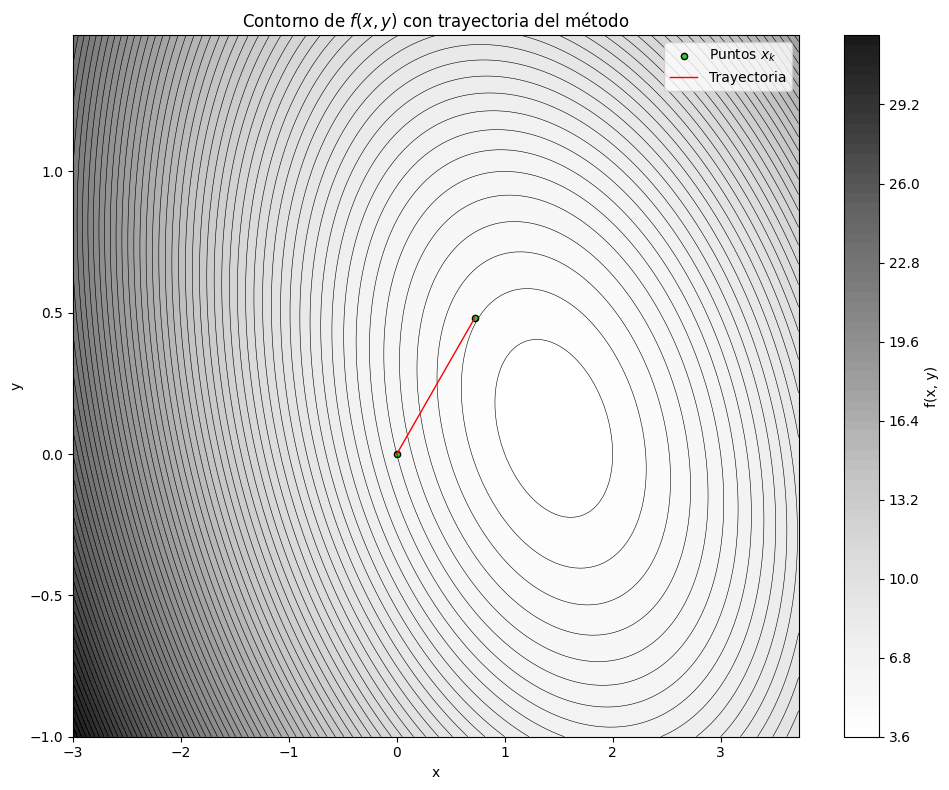

In [29]:
model.plot_contour_with_points_and_path(data)

#### Without limiting iterations

In [30]:
x_k_1, k, data = model.steepest_descent(N=25)
grad_final = model.gradient_approx(x_k_1)

print(f"Gradient at the final approximation (iteration {k}): {grad_final}")


--------------------------------------------------
Lambda aproximation (first iteration)
Iter 1: x_k = 1.000000, grad = 0.548295, grad_2 = 4.153859, x_k+1 = 0.868004
Stopped after 1 iterations. Final approximation: x = 0.868004, grad_x 0.000002
--------------------------------------------------
Iter 1: x_k = [0, 0], lambda_k = 0.868004, d_k = [0.83205029 0.5547002 ], x_k+1 = [0.72222257 0.48148172]
Iter 2: x_k = [0.72222257 0.48148172], lambda_k = 0.503440, d_k = [ 0.55469944 -0.8320508 ], x_k+1 = [1.00148073 0.06259365]
Iter 3: x_k = [1.00148073 0.06259365], lambda_k = 0.270367, d_k = [0.83205272 0.55469656], x_k+1 = [1.22644074 0.21256557]
Iter 4: x_k = [1.22644074 0.21256557], lambda_k = 0.156813, d_k = [ 0.55469656 -0.83205272], x_k+1 = [1.31342448 0.08208874]
Iter 5: x_k = [1.31342448 0.08208874], lambda_k = 0.084214, d_k = [0.83204823 0.55470329], x_k+1 = [1.38349475 0.12880263]
Iter 6: x_k = [1.38349475 0.12880263], lambda_k = 0.048843, d_k = [ 0.55470329 -0.83204823], x_k+1 = [

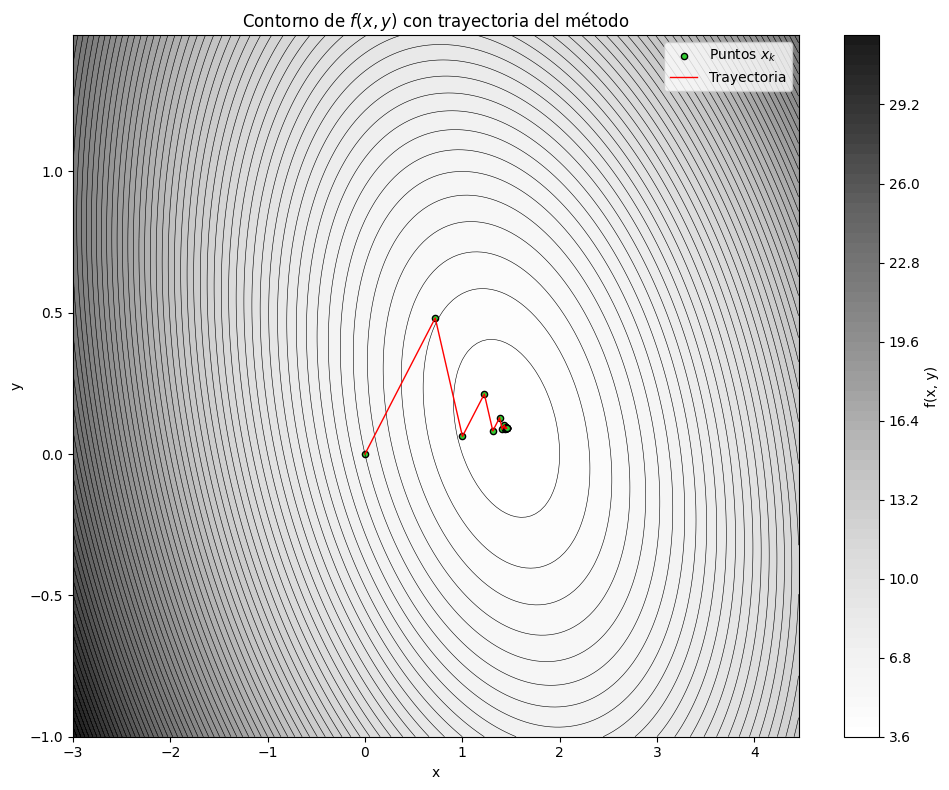

In [31]:
model.plot_contour_with_points_and_path(data)

---

### c) Perform two iterations of **Newton's Method** for multivariable functions



#### Gradient and Hessian approximation

In [32]:
x_k_1, k ,data = model.newton_method(N=20, derivative_approx=True)
grad_final = model.gradient_approx(x_k_1)

print(f"Gradient at the final approximation (iteration {k}): {grad_final}")

Iter 1: x_k = [0, 0], grad = [1.55564450e-07 6.29403196e-06], hessian = [[2.00000017 0.99999564]
 [0.99999564 6.0000005 ]], x_k+1 = [1.45454497 0.09091022]
Stopped after 1 iterations. Final approximation: x = [1.45454497 0.09091022]
Gradient at the final approximation (iteration 1): [1.55564450e-07 6.29403196e-06]


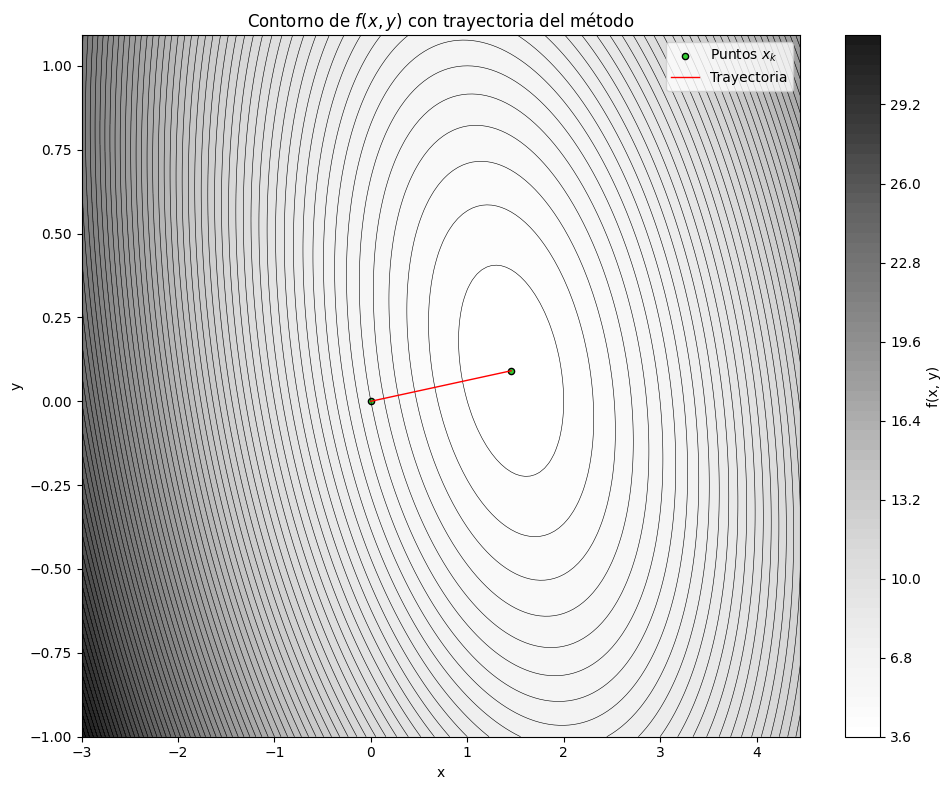

In [33]:
model.plot_contour_with_points_and_path(data)

#### Theoretical Gradient and Hessian Functions



In [34]:
x_k_1, k ,data = model.newton_method(N=20, derivative_approx=False)
grad_final = model.gradient_approx(x_k_1)

print(f"Gradient at the final approximation (iteration {k}): {grad_final}")

Iter 1: x_k = [0, 0], grad = [-4.44089210e-16 -2.22044605e-16], hessian = [[2 1]
 [1 6]], x_k+1 = [1.45454545 0.09090909]
Stopped after 1 iterations. Final approximation: x = [1.45454545 0.09090909]
Gradient at the final approximation (iteration 1): [0. 0.]


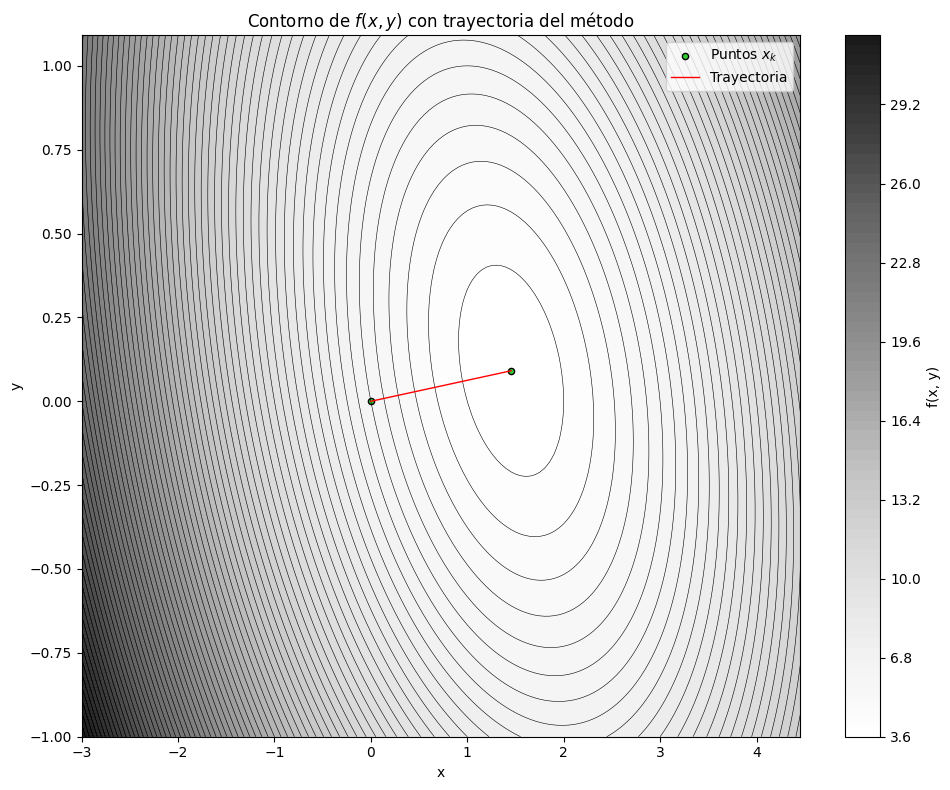

In [35]:
model.plot_contour_with_points_and_path(data)

---

### d) Solve the unconstrained minimization problem **analytically using Python**



In [36]:
x1, x2 = sp.symbols('x1 x2')
f_sym = x1**2 + 3*x2**2 + (x1 - 2)*(x2 - 3)
grad_f = [sp.diff(f_sym, var) for var in (x1, x2)]
crit_points = sp.solve(grad_f, (x1, x2), dict=True)
H = sp.hessian(f_sym, (x1, x2))

for idx, point in enumerate(crit_points, start=1):
    H_eval = H.subs(point)
    eigenvals = list(H_eval.eigenvals().keys())

    if all(ev > 0 for ev in eigenvals):
        nature = "Local minimum"
    elif all(ev < 0 for ev in eigenvals):
        nature = "Local maximum"
    else:
        nature = "Saddle point"

    print(f"Critical Point {idx}: x1 = {point[x1]}, x2 = {point[x2]}")
    print("Hessian evaluated at the point:")
    sp.pprint(H_eval, use_unicode=True)
    print("Eigenvalues:", eigenvals)
    print("Nature of the point:", nature)
    print("-" * 50)



Critical Point 1: x1 = 16/11, x2 = 1/11
Hessian evaluated at the point:
⎡2  1⎤
⎢    ⎥
⎣1  6⎦
Eigenvalues: [4 - sqrt(5), sqrt(5) + 4]
Nature of the point: Local minimum
--------------------------------------------------


## Results

| Method                             | Iterations | Final Approximation               | Gradient                          |
|------------------------------------|------------|-----------------------------------|-----------------------------------|
| **Analytical (Sympy)**             | N/A        | $$\left(\frac{16}{11}, \frac{1}{11}\right)$$ | $$\vec{0}$$                          |
| **Steepest Descent (no limit)**    | 22         | [1.45454203, 0.09090934]          | [-6.607e-06, -1.931e-06]           |
| **Steepest Descent (2 iter.)**     | 2          | [1.00148073, 0.06259365]          | [-0.93444488, -0.62295735]         |
| **Newton Method (numerical approx.)** | 1       | [1.45454497, 0.09091022]          | [1.556e-07, 6.294e-06]             |
| **Newton Method (theoretical grad & Hessian)** | 1 | $$\left(\frac{16}{11}, \frac{1}{11}\right)$$ | $$\vec{0}$$                          |


### Why Does Newton's Method Converge in One Iteration?

We are minimizing the function:

$$
f(x_1, x_2) = x_1^2 + 3x_2^2 + (x_1 - 2)(x_2 - 3)
$$

---

### 1. Expand the Function

Let's expand and simplify the function:

$$
\begin{align*}
f(x_1, x_2) &= x_1^2 + 3x_2^2 + (x_1 - 2)(x_2 - 3) \\
&= x_1^2 + 3x_2^2 + x_1 x_2 - 3x_1 - 2x_2 + 6
\end{align*}
$$

So $f$ is a **quadratic function** in the form:

$$
f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T H \mathbf{x} + \mathbf{b}^T \mathbf{x} + c
$$

---

### 2. Newton's Method Formula

For unconstrained minimization in $\mathbb{R}^n$, Newton's method updates as:

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - H^{-1} \nabla f(\mathbf{x}_k)
$$

---

### 3. Why One Iteration Is Enough

- When $f$ is a **quadratic function**, the gradient $\nabla f$ is **linear**, and the Hessian $H$ is **constant**.
- Newton's update solves the optimality condition:

$$
\nabla f(\mathbf{x}) = 0
$$

in **one step**, because the update is equivalent to solving the **linear system**:

$$
H \mathbf{x} = -\nabla f(\mathbf{0})
$$

So, starting from any point (e.g., $\mathbf{x}_0 = (0,0)$), Newton's method jumps **directly** to the unique minimum.

---

### 4. In This Case

- The Hessian is:

$$
H = \begin{bmatrix} 2 & 1 \\ 1 & 6 \end{bmatrix}
$$

- The gradient at $(0, 0)$ is:

$$
\nabla f(0, 0) = \begin{bmatrix} -3 \\ -2 \end{bmatrix}
$$

- Solving:

$$
H \mathbf{x} = -\nabla f(0, 0) \quad \Rightarrow \quad
\begin{bmatrix} 2 & 1 \\ 1 & 6 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
=
\begin{bmatrix} 3 \\ 2 \end{bmatrix}
$$

We get:

$$
\mathbf{x} = \begin{bmatrix} \frac{16}{11} \\ \frac{1}{11} \end{bmatrix}
$$


---

###  Conclusion

Newton's method converges in **one iteration** because:

- The function is **quadratic**.
- The gradient is **linear**.
- The Hessian is **constant and invertible**.
- The method directly solves:

$$
H \mathbf{x} = -\nabla f(\mathbf{x}_0)
$$

